# Question:
1.What is the most frequent genere of movies released on Netflix?
2.What generes has highest votes?
3.What movie got highest popularity?,What's it's genere?
4.Which year has the most filmmed movies?



In [4]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('mymoviedb.csv',lineterminator='\n')#lineterminator='\n'-prints row after row\nrows=1000-prints 1000 rows since data are large without applying this data wont load properly

In [7]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [8]:
df.info() #quick structure of DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [9]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [10]:
df.duplicated() #check any duplicate 

0       False
1       False
2       False
3       False
4       False
        ...  
9822    False
9823    False
9824    False
9825    False
9826    False
Length: 9827, dtype: bool

In [11]:
df.duplicated().sum() #Here it shows no duplicate value 

0

In [12]:
df.describe()#quick summary of statistical

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


#Exploration Summary
1. We have DataFrame consisting of 9827 rows and 9 columns
2. We don't have any missing values or duplicate values
3. Release_Date columns is in 'object' datatype we need to convert it in 'datetime' format
4. Overview, Original_Language and Poster_Url columns are not required for analysis as per the questions,so will drop them
5. There is noticable outliers in Popularity column
6. Vote_Average better be categorized for proper analysis
7. Genre column has comma seprated values and white spaces that need to be handled and casted into category.

In [14]:
df['Release_Date']=pd.to_datetime(df['Release_Date'], errors='coerce')
print(df['Release_Date'].dtypes)

datetime64[ns]


In [15]:
df['Release_Date']=df['Release_Date'].dt.year


In [16]:
df=df.drop(['Overview','Original_Language','Poster_Url'],axis=1)

In [17]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Release_Date  9827 non-null   int32  
 1   Title         9827 non-null   object 
 2   Popularity    9827 non-null   float64
 3   Vote_Count    9827 non-null   int64  
 4   Vote_Average  9827 non-null   float64
 5   Genre         9827 non-null   object 
dtypes: float64(2), int32(1), int64(1), object(2)
memory usage: 422.4+ KB


# Categorizing Vote_Average column

    ### We would cut the Vote_Average values and make 4 categories:popular,average,below average and not_popular to describe it more using categorize_col() function

In [20]:
def categorize_col(df,col,labels):
    
    edges=[df[col].describe()['min'],
           df[col].describe()['25%'],
           df[col].describe()['50%'],
           df[col].describe()['75%'],
           df[col].describe()['max']  ]
    df[col]=pd.cut(df[col],edges,labels=labels,duplicates='drop')
    return df
    

In [21]:
labels=['not_popular','below_avg','average','popular']
categorize_col(df,'Vote_Average',labels)
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [22]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [23]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [24]:
df.dropna(inplace=True) #Drop na values

In [25]:
df.isna().sum() #check if na values is present with their sum

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

# We will split genres into a list and then explore(explode) our DataFrame to have only one genre per row for each movie

In [27]:
df['Genre']=df['Genre'].str.split(', ') 
df.head()


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"[Action, Adventure, Science Fiction]"
1,2022,The Batman,3827.658,1151,popular,"[Crime, Mystery, Thriller]"
2,2022,No Exit,2618.087,122,below_avg,[Thriller]
3,2021,Encanto,2402.201,5076,popular,"[Animation, Comedy, Family, Fantasy]"
4,2021,The King's Man,1895.511,1793,average,"[Action, Adventure, Thriller, War]"


In [28]:
df=df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [29]:
df['Genre']=df['Genre'].astype('category')
df['Genre'].dtype

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [31]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

# Data Visualization 

In [33]:
sns.set_style('whitegrid')

In [85]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

## What is the most frequent genre of movies released on Netflix?

In [99]:

genre_percent = round(df['Genre'].value_counts(normalize=True) * 100, 2)
genre_percent


Genre
Drama              14.54
Comedy             11.76
Action             10.38
Thriller            9.68
Adventure           7.16
Romance             5.72
Horror              5.70
Animation           5.58
Family              5.50
Fantasy             5.07
Science Fiction     4.91
Crime               4.83
Mystery             2.99
History             1.67
War                 1.20
Music               1.14
TV Movie            0.84
Documentary         0.79
Western             0.54
Name: proportion, dtype: float64

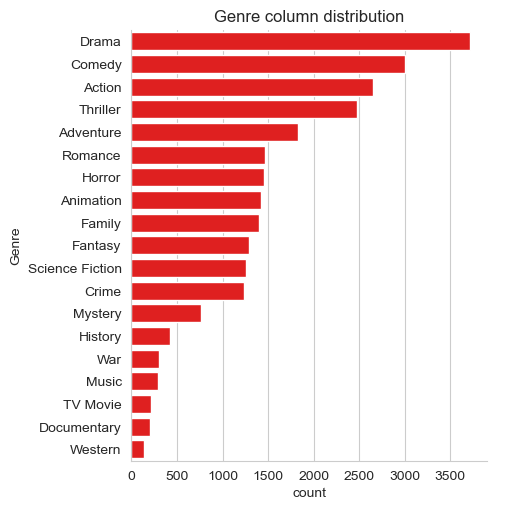

In [36]:
sns.catplot(y='Genre',data=df,kind='count',
            order=df['Genre'].value_counts().index,
            color='red',)
plt.title("Genre column distribution")
plt.show()

#y='Genre': genres on the y-axis.

#kind='count': count how many times each genre appears.

#order=...: ensures the bars are sorted from most to least common genre.

#color='red': makes the bars red.

# Which has highest votes in vote avg column?

In [39]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


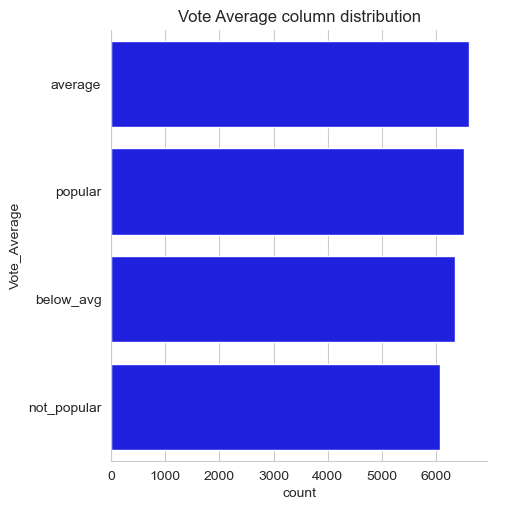

In [40]:
sns.catplot(y='Vote_Average',data=df,kind='count',
            order=df['Vote_Average'].value_counts().index,
            color='blue',)
plt.title("Vote Average column distribution")
plt.show()

# What movie got the highest popularity?What's its genre?

In [42]:
df[df['Popularity']==df['Popularity'].max()]


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


# What movie got the lowest popularity?What's its genre?

In [44]:
df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction


# What year has the most filmmed movies?

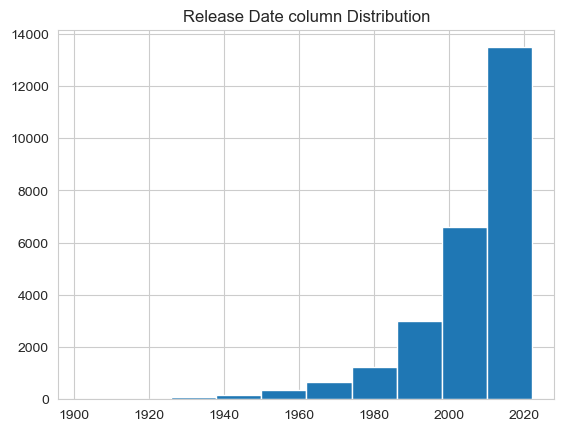

In [46]:
df['Release_Date'].hist()
plt.title("Release Date column Distribution")
plt.show()

# Conclusion

## Q1:What is the most frequent genre in the dataset?
### -> Drama is the most frequent genre in dataset and has appeared more than 14.54% of the times among 19 other genres.

## Q2:What genres has highest votes?
### -> We have 25.5% of our dataset with popular vote(6520 rows).Drama again gets the highest popularity among fans having more than 18.5% movies popularity.

## Q3:What movies got the highest popularity?What's Genre?
### -> Spider-Man:No way home has the highest popularity rate in our dataset and it has genres of Action,Adventure and science fiction.

## Q3:What movies got the lowest popularity?What's Genre?
### -> The United States,threads has lowest popularity in Music,Drama,History,Science Fiction genre.

## Q4: Which year has the most filmmed movie?
### -> 2020